Label Binarizer: Used to One-Hot Encode the integer labels as vector labels

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import argparse

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K

In [2]:
((x_train,y_train),(x_test,y_test))=mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [4]:
print(x_train.shape[0])
print(x_test.shape[0])

60000
10000


In [5]:
#FLATTENING INPUT IMAGE to 784
x_reshape_train=x_train.reshape((x_train.shape[0],28*28*1))
x_reshape_test=x_test.reshape((x_test.shape[0],28*28*1))
print(x_reshape_train.shape)
print(x_reshape_test.shape)

(60000, 784)
(10000, 784)


In [6]:
x_reshape_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
x_new_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
#NORMALIZATION scaling pixels from 0 to 1
x_new_train=x_reshape_train.astype("float32")
x_new_test=x_reshape_test.astype("float32")
print(x_new_train.shape)

(60000, 784)


In [11]:
#[1,0,0,0,0,0,0,0,0] -> Class 0/ Angka 0
#One Hot Encoding each number class
#Vector labels

lb=LabelBinarizer()
y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)
print(y_train)
print(y_test)

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
[[0 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
print(lb)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)


Malfunctioning Early Stopping, still researching why

In [15]:
import tensorflow as tf

first_layer=256
second_layer=128
output=10

model=Sequential()
model.add(Dense(first_layer,input_shape=(784,),activation="sigmoid"))
model.add(Dense(second_layer,activation="sigmoid"))
model.add(Dense(output,activation="softmax"))

#Learning rate of 0.01
sgd=SGD(0.01)
earlystopping=tf.keras.callbacks.EarlyStopping(patience=10)

model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=['accuracy'])
history=model.fit(x_new_train,y_train,validation_data=(x_new_test,y_test),batch_size=128,epochs=100,callbacks=[earlystopping],verbose=1)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
463/469 [============================>.] - ETA: 0s - loss: 2.0305 - accuracy: 0.4380WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001EA3C821AE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

469/469 [==============================] - 2s 4ms/step - loss: 0.1050 - accuracy: 0.9745 - val_loss: 0.1556 - val_accuracy: 0.9536
Epoch 45/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1036 - accuracy: 0.9741 - val_loss: 0.1550 - val_accuracy: 0.9538
Epoch 46/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1011 - accuracy: 0.9756 - val_loss: 0.1545 - val_accuracy: 0.9530
Epoch 47/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0984 - accuracy: 0.9760 - val_loss: 0.1541 - val_accuracy: 0.9539
Epoch 48/100
469/469 [==============================] - 2s 3ms/step - loss: 0.0965 - accuracy: 0.9759 - val_loss: 0.1519 - val_accuracy: 0.9542
Epoch 49/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0989 - accuracy: 0.9761 - val_loss: 0.1511 - val_accuracy: 0.9537
Epoch 50/100
469/469 [==============================] - 2s 4ms/step - loss: 0.0907 - accuracy: 0.9783 - val_loss: 0.1497 - val_accuracy: 0.9535
Epoch

In [17]:
pred=model.predict(x_new_test,batch_size=128)
print(classification_report(y_test.argmax(axis=1),
      pred.argmax(axis=1),
      target_names=[str(x) for x in lb.classes_]))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.95      1010
           4       0.95      0.96      0.96       982
           5       0.96      0.95      0.96       892

In [19]:
test_loss,test_acc=model.evaluate(x_new_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1306 - accuracy: 0.9589


In [20]:
print(f'Test Loss:{test_loss}\nTest Accuracy:{test_acc}')

Test Loss:0.13055899739265442
Test Accuracy:0.958899974822998


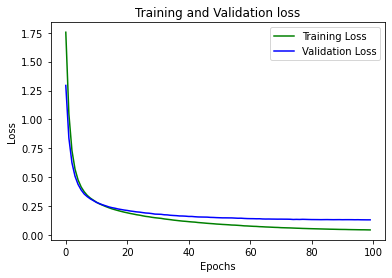

In [21]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training Loss')
plt.plot(loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

No overfitting spotted

Model seems very good at predicting the MNIST dataset

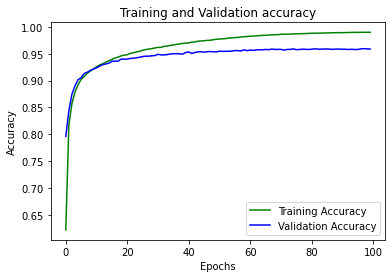

In [22]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training Accuracy')
plt.plot(loss_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.save_weights('MNIST-FFMLP.h5')
print("Model Saved!")

Model Saved!
